In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/Bank%20Data.csv')

#Exploratory Data Analysis

In [48]:
data.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,5015
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,7498
Num_Bank_Accounts,0


In [49]:
data.head(30)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
5,0x1617,CUS_0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,3,5.42,5.0,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.62736875017606,Low_spent_Large_value_payments,303.3550833433617
6,0x1618,CUS_0x21b1,November,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,NaN,5.42,5.0,_,605.03,30.996424,27 Years and 5 Months,No,18.816215,72.68014533363515,High_spent_Large_value_payments,452.30230675990265
7,0x1619,CUS_0x21b1,December,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,2_,7.42,5.0,_,605.03,33.875167,27 Years and 6 Months,No,18.816215,153.53448761392985,!@9#%8,421.44796447960783
8,0x1622,CUS_0x2dbc,September,Langep,35,486-85-3974,Engineer,143162.64,NaN,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,1942,7.1,3.0,Good,1303.01,35.229707,18 Years and 5 Months,No,246.992319,397.50365354404653,Low_spent_Medium_value_payments,854.2260270022115
9,0x1623,CUS_0x2dbc,October,Langep,35,486-85-3974,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",6,3,2.1,3.0,Good,1303.01,35.685836,18 Years and 6 Months,No,246.992319,453.6151305781054,Low_spent_Large_value_payments,788.1145499681528


In [50]:
data.dtypes

,0
ID,object
Customer_ID,object
Month,object
Name,object
Age,object
SSN,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


In [51]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [52]:
data.shape

(50000, 27)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [54]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,42502.0,4182.004291,3174.109304,303.645417,1625.188333,3086.305000,5934.189094,15204.633333
Num_Bank_Accounts,50000.0,16.838260,116.396848,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,50000.0,22.921480,129.314804,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,50000.0,68.772640,451.602363,1.000000,8.000000,13.000000,20.000000,5799.000000
Delay_from_due_date,50000.0,21.052640,14.860397,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,48965.0,30.080200,196.984121,0.000000,4.000000,7.000000,10.000000,2593.000000
Credit_Utilization_Ratio,50000.0,32.279581,5.106238,20.509652,28.061040,32.280390,36.468591,48.540663
Total_EMI_per_month,50000.0,1491.304305,8595.647887,0.000000,32.222388,74.733349,176.157491,82398.000000


In [55]:
data.describe(include ='all')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
count,50000,50000,50000,44985,50000,50000,50000,50000,42502.000000,50000.000000,50000.000000,50000.000000,50000,44296,50000.000000,46502,50000,48965.000000,50000,50000,50000.000000,45530,50000,50000.000000,47729,50000,49438
unique,50000,12500,4,10139,976,12501,16,16121,NaN,NaN,NaN,NaN,263,6260,NaN,443,3927,NaN,4,12685,NaN,399,3,NaN,45450,7,49433
top,0x160a,CUS_0xd40,September,Stevex,39,#F%$D@*&8,_______,109945.32,NaN,NaN,NaN,NaN,2,Not Specified,NaN,19,_,NaN,Standard,1109.03,NaN,20 Years and 1 Months,Yes,NaN,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__
freq,1,4,12500,22,1493,2828,3438,8,NaN,NaN,NaN,NaN,7173,704,NaN,2622,1059,NaN,18379,12,NaN,254,26158,NaN,2175,12694,6
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4182.004291,16.838260,22.921480,68.772640,NaN,NaN,21.052640,NaN,NaN,30.080200,NaN,NaN,32.279581,NaN,NaN,1491.304305,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3174.109304,116.396848,129.314804,451.602363,NaN,NaN,14.860397,NaN,NaN,196.984121,NaN,NaN,5.106238,NaN,NaN,8595.647887,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.645417,-1.000000,0.000000,1.000000,NaN,NaN,-5.000000,NaN,NaN,0.000000,NaN,NaN,20.509652,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1625.188333,3.000000,4.000000,8.000000,NaN,NaN,10.000000,NaN,NaN,4.000000,NaN,NaN,28.061040,NaN,NaN,32.222388,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3086.305000,6.000000,5.000000,13.000000,NaN,NaN,18.000000,NaN,NaN,7.000000,NaN,NaN,32.280390,NaN,NaN,74.733349,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5934.189094,7.000000,7.000000,20.000000,NaN,NaN,28.000000,NaN,NaN,10.000000,NaN,NaN,36.468591,NaN,NaN,176.157491,NaN,NaN,NaN


In [56]:
data.sample(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
40126,0x1ec40,CUS_0x9ff3,November,Rp,44,666-38-6886,Teacher,40403.35,3340.945833,1,5,3,2,"Auto Loan, and Not Specified",11,7_,4.94,NaN,Good,303.23,26.148740,16 Years and 5 Months,No,55.225669,250.09352586227868,Low_spent_Large_value_payments,298.7753886855872
44105,0x21ae3,CUS_0x55f,October,Nickela,36,650-81-9177,Journalist,18124.54,1588.378333,7,8,4509,9,"Student Loan, Auto Loan, Personal Loan, Person...",42,15,_,10.0,Bad,2854.37,38.989244,9 Years and 10 Months,Yes,119.343731,212.00456622324364,Low_spent_Small_value_payments,117.48953561126604
4949,0x5007,CUS_0x63c2,October,Xiaoyi Shaoy,49,602-93-9483,Accountant,151085.88,12540.490000,2,7,6,3,"Student Loan, Mortgage Loan, and Student Loan",1,4,2.25,4.0,Good,1015.74,34.136401,33 Years and 6 Months,No,323.015110,528.3499061278624,High_spent_Small_value_payments,662.6839838763186
5638,0x5818,CUS_0x5d8b,November,Stevex,26,574-78-4992,Scientist,111456.21,9328.017500,1,7,7,3_,"Debt Consolidation Loan, Auto Loan, and Payday...",6,2,4.91,5.0,_,317.32,43.545345,NaN,No,154.397390,265.5785300821732,High_spent_Medium_value_payments,762.8258297161711
9038,0x7ff0,CUS_0x87a,November,Anna Yukhananovw,34,506-42-3465,_______,20274.94,1629.578333,1,6,5,1,Student Loan,3,2,2.0,3.0,Good,11.02,33.317719,22 Years and 3 Months,No,14.553543,34.106512011898786,High_spent_Medium_value_payments,364.29777815066507
17857,0xe74b,CUS_0xb196,October,Levinem,50,160-70-2253,Media_Manager,118297.6,10026.133333,2,1,9,3,"Payday Loan, Debt Consolidation Loan, and Auto...",8,NaN,10.97,7.0,_,1446.83,36.328593,31 Years and 2 Months,NM,264.092746,129.34903922255882,High_spent_Large_value_payments,849.1715479075252
20706,0x108ac,CUS_0x62c3,November,Charlie Zhuk,46,960-26-5577,_______,17132.905,NaN,1,5,5,2,"Personal Loan, and Credit-Builder Loan",4,NaN,2.16,0.0,Good,1107.05,24.216277,22 Years and 5 Months,No,15.401792,62.988946288370045,Low_spent_Large_value_payments,319.98346989375216
46845,0x23aff,CUS_0x4683,October,Rodrigow,37,056-47-2213,Developer,108734.13,NaN,5,6,9,2,"Debt Consolidation Loan, and Payday Loan",21,11,18.89,12.0,Standard,1105.29,39.061234,NaN,NM,910.331491,1059.0095613200292,Low_spent_Small_value_payments,NaN
3658,0x40e4,CUS_0x4b23,November,NaN,27,075-54-1956,Teacher,39471.98,3166.331667,5,3,21,4,"Credit-Builder Loan, Payday Loan, Debt Consoli...",14,10,10.74,1457.0,Standard,2244.32,27.548668,14 Years and 2 Months,Yes,77.356973,210.5231323679396,High_spent_Small_value_payments,288.7530609959808
36347,0x1bff5,CUS_0x8382,December,Allison Martells,32,853-68-8996,Engineer,54378.51,4369.542500,6,10,15,5,"Auto Loan, Home Equity Loan, Debt Consolidatio...",47,24,1.61,10.0,Bad,1482.64,40.363292,17 Years and 3 Months,Yes,153.506861,304.1475024758868,High_spent_Small_value_payments,239.29988631504867


#Data Cleaning

In [57]:
##removing the inconsistencies in the data by creating a list and defining a function
list_to_change = ['Payment_Behaviour', 'Num_of_Loan', 'Annual_Income', 'Age','Num_of_Delayed_Payment','Amount_invested_monthly','Monthly_Balance','Changed_Credit_Limit']

def underscore_checker(columns, frame):
    for column in columns:
        data[column] = data[column].str.replace('_',' ')
        data[column] = data[column].str.replace('-',' ')
    return data


In [58]:
data_edited = underscore_checker(list_to_change, data)
pd.set_option('display.max_columns', None)
data_edited.sample(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
29751,0x172a9,CUS_0x35cb,December,Jessicad,43,287-13-3802,Teacher,78658.16,6390.846667,5,3,3,1,Credit-Builder Loan,14,8,6.86,5.0,Good,195.21,31.874132,17 Years and 1 Months,NM,38.911782,54.052917943051796,High spent Large value payments,786.1199665188417
14078,0xbb00,CUS_0x7bf,November,Caroline Valetkevitcha,32,330-17-2088,Engineer,17464.64,NaN,6,5,5,7,"Payday Loan, Student Loan, Mortgage Loan, Home...",20,14,16.89,9.0,Standard,289.05,32.010736,19 Years and 1 Months,NM,72.581554,205.00812466322373,Low spent Small value payments,184.44898789639754
26692,0x14ed6,CUS_0x3643,September,Melanie Burtonk,18,580-77-2584,Mechanic,46230.26,3579.521667,8,3,11,1,Student Loan,23,15,10.76,11.0,_,260.98,40.589997,8 Years and 5 Months,Yes,34.425287,102.80402527160366,Low spent Large value payments,490.72285471943945
30459,0x17af5,CUS_0xc4ac,December,Scott Malonex,39,267-31-8739,Engineer,128363.64,10463.970000,0,6,6,0,NaN,15,10,7.7,1.0,_,492.7,31.937060,21 Years and 3 Months,No,0.000000,383.1985778673317,!@9#%8,913.1984221326683
7512,0x6e12,CUS_0x7ccf,September,Thomasi,15,365-87-0558,Media_Manager,14547.7,1157.025911,9,10,26,7,"Auto Loan, Personal Loan, Not Specified, Not S...",41,16,24.81,10.0,Bad,4499.91,37.942758,4 Years and 9 Months,Yes,67.570528,94.75639654897516,Low spent Small value payments,229.3863306057557
43894,0x21868,CUS_0x4f0d,November,Christiew,31,462-09-7916,_______,30616.07,2813.339167,1,2,3,0,NaN,4,NaN,7.6099999999999985,6.0,Good,1244.22,36.587396,29 Years and 5 Months,No,0.000000,197.64846449166012,Low spent Small value payments,373.6854521750065
39691,0x1e725,CUS_0x2b2b,December,Mennc,24,216-65-5815,Scientist,16069.92,1115.160000,8,7,21,7,"Home Equity Loan, Debt Consolidation Loan, Stu...",57,23,28.59,11.0,Bad,4555.49,28.683256,14 Years and 2 Months,Yes,72.924860,38.959644274345024,Low spent Small value payments,289.63149579625923
3292,0x3c9e,CUS_0xa090,September,Camposn,36,301-85-8354,Engineer,9158.03,822.124562,7,9,27,2,"Debt Consolidation Loan, and Credit-Builder Loan",57,22,1.19,9.0,_,2495.15,35.287146,13 Years and 6 Months,Yes,54.263164,33.53192695801838,Low spent Medium value payments,319.56643059804236
38941,0x1de5f,CUS_0xae15,October,Taro Fuseu,44,181-18-0854,Lawyer,30564.96,2263.080000,7,6,9,1,Debt Consolidation Loan,10,8,0.62,0.0,Standard,1142.05,27.951298,24 Years and 5 Months,No,13.607220,30.064505893939327,High spent Large value payments,422.63627454942383
22442,0x11d04,CUS_0xbdcf,November,Michael Ermany,41,#F%$D@*&8,Accountant,68291.70000000001,5414.975000,8,5,5,2,"Personal Loan, and Not Specified",18,NaN,2.69,1.0,Standard,1210.72,32.118869,32 Years and 7 Months,Yes,62.352471,119.71370339366293,High spent Large value payments,599.4313256370226


In [59]:
##Coverting some columns from odject columns to float data type
list_to_convert = ['Num_of_Loan', 'Annual_Income', 'Num_of_Delayed_Payment', 'Amount_invested_monthly','Monthly_Balance','Changed_Credit_Limit']

In [60]:
def convert_to_float64(data_edited, columns:list):
  for column in columns:
    data_edited[column] = data_edited[column].astype('float64')
  return data_edited

  #this was giving me error because a column has a str, so i want to pick out the column..
  #I will use the code below by intoducing more blocks

In [61]:
##adding more blocks to allow the conversion work and yet return the column giving me error

def convert_to_float64(data_edited, columns:list):
  for column in columns:
    try:   #new blocks
     data_edited[column] = data_edited[column].astype('float64')
    except:
      print(f"Columnn: {column} has an error")
  return data

data_edited = convert_to_float64(data_edited, list_to_convert)
data_edited.dtypes
##chabge_credit_limit was  the column giving me erroe and it couln't convert to a float. so the best would be to handle it seperetaely below...

Columnn: Changed_Credit_Limit has an error


,0
ID,object
Customer_ID,object
Month,object
Name,object
Age,object
SSN,object
Occupation,object
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


In [62]:
##Trying to point out the specific error that the column change credit limit has

def find_error_cell(data_edited, column):
    for index, value in data_edited[column].items():
        try:
            float(value)
        except ValueError:
            print(f"Error in column: '{column}', row {index}: Value is '{value}'")


column_with_error = 'Changed_Credit_Limit'
find_error_cell(data_edited, column_with_error)

## chnage credit limit column couldn't convert becuase it had empty cells..

Error in column: 'Changed_Credit_Limit', row 33: Value is ' '
Error in column: 'Changed_Credit_Limit', row 105: Value is ' '
Error in column: 'Changed_Credit_Limit', row 189: Value is ' '
Error in column: 'Changed_Credit_Limit', row 263: Value is ' '
Error in column: 'Changed_Credit_Limit', row 264: Value is ' '
Error in column: 'Changed_Credit_Limit', row 268: Value is ' '
Error in column: 'Changed_Credit_Limit', row 340: Value is ' '
Error in column: 'Changed_Credit_Limit', row 390: Value is ' '
Error in column: 'Changed_Credit_Limit', row 399: Value is ' '
Error in column: 'Changed_Credit_Limit', row 405: Value is ' '
Error in column: 'Changed_Credit_Limit', row 407: Value is ' '
Error in column: 'Changed_Credit_Limit', row 471: Value is ' '
Error in column: 'Changed_Credit_Limit', row 493: Value is ' '
Error in column: 'Changed_Credit_Limit', row 546: Value is ' '
Error in column: 'Changed_Credit_Limit', row 556: Value is ' '
Error in column: 'Changed_Credit_Limit', row 588: Value 

In [63]:
##Checking a specific range of data for the 'Chnaged credit limit" column to understand its problem

start_index = 689
end_index = 699
filtered_data = data_edited['Changed_Credit_Limit'][start_index:end_index] # Extract the desired data
filtered_data

,Changed_Credit_Limit
689,
690,19.51
691,15.51
692,7.12
693,7.12
694,7.12
695,7.12
696,9.37
697,
698,9.37


In [64]:
data_edited.isnull().sum()
#the changed credit limit column is showing no null values, yet there are empty cells.

,0
ID,0
Customer_ID,0
Month,0
Name,5015
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,7498
Num_Bank_Accounts,0


In [65]:
#converting the chnage credit limit column to a float so i can fill it with the mean
#but in this case, it can replace the empty cells with NaN rather than ignore it. By this, the conversion would only work.
def convert_to_float64(data_edited, columns):
    for col in columns:
        data_edited[col] = pd.to_numeric(data_edited[col], errors='coerce')
        data_edited[col] = data_edited[col].astype('float64')
    return data_edited

data_edited = convert_to_float64(data_edited, ['Changed_Credit_Limit','Outstanding_Debt'])
data_edited.dtypes

,0
ID,object
Customer_ID,object
Month,object
Name,object
Age,object
SSN,object
Occupation,object
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


In [66]:
data_edited.isnull().sum()
#By this, it is now picking the chnaged credit limit column as having null values

,0
ID,0
Customer_ID,0
Month,0
Name,5015
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,7498
Num_Bank_Accounts,0


In [67]:
##filtering down, to see where the null values are for the changed credit limit column
null_values = data_edited['Changed_Credit_Limit'].isnull()
filtered_df = data_edited[null_values]
filtered_df


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
33,0x166b,CUS_0x4157,October,Charlie Zhur,24,070-19-1622,Doctor,114838.41,9843.867500,2,5,7,3.0,"Personal Loan, Debt Consolidation Loan, and Au...",11,9.0,NaN,8.0,Good,1377.74,29.176392,22 Years and 1 Months,No,226.892792,916.951486,Low spent Medium value payments,120.542472
105,0x1743,CUS_0xb95f,October,Ashleyk,30,467-13-1148,Writer,34290.12,2697.510000,9,8,25,7.0,"Home Equity Loan, Credit-Builder Loan, Credit-...",55,9.0,NaN,13.0,Standard,2686.81,27.699564,14 Years and 5 Months,Yes,185.111983,188.380762,Low spent Small value payments,186.258255
189,0x183f,CUS_0x75c6,October,"""John ODonnell""p",30,587-65-8904,Teacher,87215.68,7489.973333,2,6,8,2.0,"Auto Loan, and Payday Loan",2,NaN,NaN,0.0,_,680.77,28.218047,21 Years and 5 Months,No,121.682017,183.965235,High spent Large value payments,683.350082
263,0x1919,CUS_0x5cdf,December,Wohli,18,616-36-8188,Musician,75273.24,6424.022011,8,6,32,5.0,"Home Equity Loan, Credit-Builder Loan, Debt Co...",50,9.0,NaN,8.0,Standard,2497.34,27.948016,6 Years and 1 Months,Yes,351.367045,339.074222,Low spent Small value payments,383.583722
264,0x1922,CUS_0x2184,September,NaN,500,496-44-5947,Media_Manager,54820.89,NaN,8,7,28,6.0,"Home Equity Loan, Mortgage Loan, Debt Consolid...",41,17.0,NaN,11.0,Bad,4795.13,33.747274,3 Years and 7 Months,Yes,169.481984,458.333799,Low spent Small value payments,91.724967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49741,0x25cef,CUS_0x862b,October,Edward Taylorc,45,710-51-5469,_______,145282.24,12154.853333,5,7,10,1.0,Student Loan,26,9.0,NaN,4.0,Good,1417.24,34.590865,23 Years and 11 Months,No,104.351443,328.901951,High spent Medium value payments,1032.231939
49804,0x25dae,CUS_0x2829,September,Alistair Barre,500,#F%$D@*&8,Journalist,64901.37,5298.447500,3,5,20,0.0,NaN,15,18.0,NaN,3.0,Standard,442.06,37.402126,31 Years and 6 Months,Yes,0.000000,10000.000000,High spent Small value payments,445.084483
49810,0x25dbc,CUS_0xae66,November,NaN,500,#F%$D@*&8,Writer,142560.36,NaN,6,3,13,1.0,Student Loan,23,15.0,NaN,2.0,Standard,220.75,35.410902,18 Years and 1 Months,No,76.772094,375.188791,High spent Medium value payments,975.342115
49856,0x25e4a,CUS_0xadbd,September,Scotts,27,864-24-3672,Doctor,35793.97,2799.830833,5,6,8,4.0,"Personal Loan, Payday Loan, Not Specified, and...",10,11.0,NaN,0.0,Good,82.15,38.158050,23 Years and 7 Months,NM,113.833391,277.986171,Low spent Small value payments,178.163522


In [68]:
##Creating a numerical list to store all my floats and int, which i have cleaned and transformed'''

numerical_columns =[]
for col in data_edited.columns:
  if data_edited[col].dtype != 'object':
    numerical_columns.append(col)
  else:
    pass


##Filling the numerical columns with their mean so it replaces both the N/A cells or the empty cells..

def fill_nulls_with_mean(data_edited, numerical_columns):
  df_copy = data_edited.copy()
  for col in numerical_columns:
    df_copy[col] = df_copy[col].fillna(df_copy[col].mean())
    df_copy[col] = df_copy[col].round(2)
  return df_copy

df_copy = fill_nulls_with_mean(data_edited, numerical_columns)
df_copy

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.00,11.27,2022.0,Good,809.98,35.03,22 Years and 9 Months,No,49.57,236.64,Low spent Small value payments,186.27
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9.00,13.27,4.0,Good,809.98,33.05,22 Years and 10 Months,No,49.57,21.47,High spent Medium value payments,361.44
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.00,12.27,4.0,Good,809.98,33.81,NaN,No,49.57,148.23,Low spent Medium value payments,264.68
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,4182.00,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5.00,11.27,4.0,Good,809.98,32.43,23 Years and 0 Months,No,49.57,39.08,High spent Medium value payments,343.83
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,1.00,5.42,5.0,Good,605.03,25.93,27 Years and 3 Months,No,18.82,39.68,High spent Large value payments,485.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.91,10,8,29,5.0,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,25.00,18.31,12.0,_,3571.70,34.78,NaN,Yes,60.96,146.49,Low spent Small value payments,275.54
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,4182.00,4,6,7,2.0,"Auto Loan, and Student Loan",20,30.91,11.50,7.0,Good,502.38,27.76,31 Years and 11 Months,NM,35.10,181.44,Low spent Small value payments,409.39
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.42,4,6,7,2.0,"Auto Loan, and Student Loan",23,5.00,13.50,7.0,Good,502.38,36.86,32 Years and 0 Months,No,35.10,10000.00,Low spent Large value payments,349.73
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,4182.00,4,6,7,2.0,"Auto Loan, and Student Loan",21,6.00,11.50,7.0,Good,502.38,39.14,32 Years and 1 Months,No,35.10,97.60,High spent Small value payments,463.24


In [69]:
df_copy.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,5015
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [70]:
data_edited.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,5015
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,7498
Num_Bank_Accounts,0


In [71]:
##now combinning/appending data_edited with df_copy values
for col in numerical_columns:
  data_edited[col] = df_copy[col]

In [72]:
data_edited.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,5015
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [73]:
##exploring the name column to understand how to tackling its cleaning
data_edited['Customer_ID']

,Customer_ID
0,CUS_0xd40
1,CUS_0xd40
2,CUS_0xd40
3,CUS_0xd40
4,CUS_0x21b1
...,...
49995,CUS_0x8600
49996,CUS_0x942c
49997,CUS_0x942c
49998,CUS_0x942c


In [74]:
data_edited.head(20)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.00,11.27,2022.0,Good,809.98,35.03,22 Years and 9 Months,No,49.57,236.64,Low spent Small value payments,186.27
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9.00,13.27,4.0,Good,809.98,33.05,22 Years and 10 Months,No,49.57,21.47,High spent Medium value payments,361.44
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.00,12.27,4.0,Good,809.98,33.81,NaN,No,49.57,148.23,Low spent Medium value payments,264.68
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,4182.00,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5.00,11.27,4.0,Good,809.98,32.43,23 Years and 0 Months,No,49.57,39.08,High spent Medium value payments,343.83
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,1.00,5.42,5.0,Good,605.03,25.93,27 Years and 3 Months,No,18.82,39.68,High spent Large value payments,485.30
5,0x1617,CUS_0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,3.00,5.42,5.0,Good,605.03,30.12,27 Years and 4 Months,No,18.82,251.63,Low spent Large value payments,303.36
6,0x1618,CUS_0x21b1,November,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,30.91,5.42,5.0,_,605.03,31.00,27 Years and 5 Months,No,18.82,72.68,High spent Large value payments,452.30
7,0x1619,CUS_0x21b1,December,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,2.00,7.42,5.0,_,605.03,33.88,27 Years and 6 Months,No,18.82,153.53,!@9#%8,421.45
8,0x1622,CUS_0x2dbc,September,Langep,35,486-85-3974,Engineer,143162.64,4182.00,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",8,1942.00,7.10,3.0,Good,1303.01,35.23,18 Years and 5 Months,No,246.99,397.50,Low spent Medium value payments,854.23
9,0x1623,CUS_0x2dbc,October,Langep,35,486-85-3974,Engineer,143162.64,12187.22,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",6,3.00,2.10,3.0,Good,1303.01,35.69,18 Years and 6 Months,No,246.99,453.62,Low spent Large value payments,788.11


In [75]:
#Counting occurrences of each value in the 'customer_id' column
value_counts = data_edited['Customer_ID'].value_counts()
print(value_counts)

Customer_ID
CUS_0xd40     4
CUS_0x9bf4    4
CUS_0x5ae3    4
CUS_0xbe9a    4
CUS_0x4874    4
             ..
CUS_0x2eb4    4
CUS_0x7863    4
CUS_0x9d89    4
CUS_0xc045    4
CUS_0x942c    4
Name: count, Length: 12500, dtype: int64


In [76]:
data_edited.shape

####so basically each customer_id appeared all over again (like 4 times)
# meaning i can fill their names using their customer_id as a reference, where possible

(50000, 27)

In [77]:
#created a new dataframe holding customer_id and name to understandthe  cell in the name column that had NaN in relation to the customer_id
new_df = data_edited[['Customer_ID','Name']]
null_values = new_df['Name'].isnull()
filtered_data = new_df[null_values]
filtered_data

,Customer_ID,Name
10,CUS_0x2dbc,NaN
30,CUS_0x5407,NaN
38,CUS_0xba08,NaN
64,CUS_0x6070,NaN
69,CUS_0xfdb,NaN
...,...,...
49953,CUS_0xa053,NaN
49970,CUS_0xad4f,NaN
49978,CUS_0x2084,NaN
49984,CUS_0xf16,NaN


In [78]:
##I then took a sample customer_id(one that showed null) off the data and filtered down to see whhat the data points were
filtered_data = new_df[new_df['Customer_ID'] == 'CUS_0x2084']
print(filtered_data)

      Customer_ID   Name
49976  CUS_0x2084  Ryanl
49977  CUS_0x2084  Ryanl
49978  CUS_0x2084    NaN
49979  CUS_0x2084  Ryanl


In [79]:
data_edited.head(40)
##exploring the data to see how top 40 names were positioned. Giving me an insight into the possibility of using forwardfill

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.00,11.27,2022.0,Good,809.98,35.03,22 Years and 9 Months,No,49.57,236.64,Low spent Small value payments,186.27
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9.00,13.27,4.0,Good,809.98,33.05,22 Years and 10 Months,No,49.57,21.47,High spent Medium value payments,361.44
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.00,12.27,4.0,Good,809.98,33.81,NaN,No,49.57,148.23,Low spent Medium value payments,264.68
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,4182.00,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5.00,11.27,4.0,Good,809.98,32.43,23 Years and 0 Months,No,49.57,39.08,High spent Medium value payments,343.83
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,1.00,5.42,5.0,Good,605.03,25.93,27 Years and 3 Months,No,18.82,39.68,High spent Large value payments,485.30
5,0x1617,CUS_0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,3.00,5.42,5.0,Good,605.03,30.12,27 Years and 4 Months,No,18.82,251.63,Low spent Large value payments,303.36
6,0x1618,CUS_0x21b1,November,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,30.91,5.42,5.0,_,605.03,31.00,27 Years and 5 Months,No,18.82,72.68,High spent Large value payments,452.30
7,0x1619,CUS_0x21b1,December,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,2.00,7.42,5.0,_,605.03,33.88,27 Years and 6 Months,No,18.82,153.53,!@9#%8,421.45
8,0x1622,CUS_0x2dbc,September,Langep,35,486-85-3974,Engineer,143162.64,4182.00,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",8,1942.00,7.10,3.0,Good,1303.01,35.23,18 Years and 5 Months,No,246.99,397.50,Low spent Medium value payments,854.23
9,0x1623,CUS_0x2dbc,October,Langep,35,486-85-3974,Engineer,143162.64,12187.22,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",6,3.00,2.10,3.0,Good,1303.01,35.69,18 Years and 6 Months,No,246.99,453.62,Low spent Large value payments,788.11


In [80]:
###using forwrad fill to fill the name column as a result of the perfect psitioning of each NaN value
import pandas as pd
data_edited['Name'] = data_edited['Name'].ffill()

In [81]:
data_edited.isnull().sum()
##Now Name has no null value

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [82]:
##Cleaning the payment_min_amount column
data_edited['Payment_of_Min_Amount'] = data_edited['Payment_of_Min_Amount'].replace('NM', 'No')
data_edited.head(30)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.00,11.27,2022.0,Good,809.98,35.03,22 Years and 9 Months,No,49.57,236.64,Low spent Small value payments,186.27
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9.00,13.27,4.0,Good,809.98,33.05,22 Years and 10 Months,No,49.57,21.47,High spent Medium value payments,361.44
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.00,12.27,4.0,Good,809.98,33.81,NaN,No,49.57,148.23,Low spent Medium value payments,264.68
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,4182.00,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5.00,11.27,4.0,Good,809.98,32.43,23 Years and 0 Months,No,49.57,39.08,High spent Medium value payments,343.83
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,1.00,5.42,5.0,Good,605.03,25.93,27 Years and 3 Months,No,18.82,39.68,High spent Large value payments,485.30
5,0x1617,CUS_0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,3.00,5.42,5.0,Good,605.03,30.12,27 Years and 4 Months,No,18.82,251.63,Low spent Large value payments,303.36
6,0x1618,CUS_0x21b1,November,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,30.91,5.42,5.0,_,605.03,31.00,27 Years and 5 Months,No,18.82,72.68,High spent Large value payments,452.30
7,0x1619,CUS_0x21b1,December,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,2.00,7.42,5.0,_,605.03,33.88,27 Years and 6 Months,No,18.82,153.53,!@9#%8,421.45
8,0x1622,CUS_0x2dbc,September,Langep,35,486-85-3974,Engineer,143162.64,4182.00,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",8,1942.00,7.10,3.0,Good,1303.01,35.23,18 Years and 5 Months,No,246.99,397.50,Low spent Medium value payments,854.23
9,0x1623,CUS_0x2dbc,October,Langep,35,486-85-3974,Engineer,143162.64,12187.22,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",6,3.00,2.10,3.0,Good,1303.01,35.69,18 Years and 6 Months,No,246.99,453.62,Low spent Large value payments,788.11


In [83]:
#Cleaning occupation column
#Understanding the column positioning
data_edited[['Name','Occupation']]

## I didnt want to use a forward fill in this case due to its unstable positioning

,Name,Occupation
0,Aaron Maashoh,Scientist
1,Aaron Maashoh,Scientist
2,Aaron Maashoh,Scientist
3,Aaron Maashoh,Scientist
4,Rick Rothackerj,_______
...,...,...
49995,Sarah McBridec,Architect
49996,Nicks,Mechanic
49997,Nicks,Mechanic
49998,Nicks,Mechanic


In [84]:
## converting this because the fill will not be able to replace the ___
data_edited['Occupation'] = data_edited['Occupation'].str.replace ('_______','NaN')
data_edited['Monthly_Inhand_Salary'] = data_edited['Monthly_Inhand_Salary'].ffill()
data_edited.head(35)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.00,11.27,2022.0,Good,809.98,35.03,22 Years and 9 Months,No,49.57,236.64,Low spent Small value payments,186.27
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9.00,13.27,4.0,Good,809.98,33.05,22 Years and 10 Months,No,49.57,21.47,High spent Medium value payments,361.44
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.00,12.27,4.0,Good,809.98,33.81,NaN,No,49.57,148.23,Low spent Medium value payments,264.68
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,4182.00,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5.00,11.27,4.0,Good,809.98,32.43,23 Years and 0 Months,No,49.57,39.08,High spent Medium value payments,343.83
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,NaN,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,1.00,5.42,5.0,Good,605.03,25.93,27 Years and 3 Months,No,18.82,39.68,High spent Large value payments,485.30
5,0x1617,CUS_0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,3.00,5.42,5.0,Good,605.03,30.12,27 Years and 4 Months,No,18.82,251.63,Low spent Large value payments,303.36
6,0x1618,CUS_0x21b1,November,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,30.91,5.42,5.0,_,605.03,31.00,27 Years and 5 Months,No,18.82,72.68,High spent Large value payments,452.30
7,0x1619,CUS_0x21b1,December,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,2.00,7.42,5.0,_,605.03,33.88,27 Years and 6 Months,No,18.82,153.53,!@9#%8,421.45
8,0x1622,CUS_0x2dbc,September,Langep,35,486-85-3974,Engineer,143162.64,4182.00,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",8,1942.00,7.10,3.0,Good,1303.01,35.23,18 Years and 5 Months,No,246.99,397.50,Low spent Medium value payments,854.23
9,0x1623,CUS_0x2dbc,October,Langep,35,486-85-3974,Engineer,143162.64,12187.22,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",6,3.00,2.10,3.0,Good,1303.01,35.69,18 Years and 6 Months,No,246.99,453.62,Low spent Large value payments,788.11


In [85]:
data_edited.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [86]:
##filling the occupation column with the mode in relation to each Name grouping

if data_edited['Occupation'].str.contains("NaN").any():
    data_edited['Occupation'].replace("NaN", pd.NA, inplace=True)

data_edited['Occupation'] = data_edited.groupby('Name')['Occupation'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else ''))       # Now, fill the actual NaN values based on mode within 'Name' groups
data_edited.head(20)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.00,11.27,2022.0,Good,809.98,35.03,22 Years and 9 Months,No,49.57,236.64,Low spent Small value payments,186.27
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9.00,13.27,4.0,Good,809.98,33.05,22 Years and 10 Months,No,49.57,21.47,High spent Medium value payments,361.44
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.00,12.27,4.0,Good,809.98,33.81,NaN,No,49.57,148.23,Low spent Medium value payments,264.68
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,4182.00,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5.00,11.27,4.0,Good,809.98,32.43,23 Years and 0 Months,No,49.57,39.08,High spent Medium value payments,343.83
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,1.00,5.42,5.0,Good,605.03,25.93,27 Years and 3 Months,No,18.82,39.68,High spent Large value payments,485.30
5,0x1617,CUS_0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,3.00,5.42,5.0,Good,605.03,30.12,27 Years and 4 Months,No,18.82,251.63,Low spent Large value payments,303.36
6,0x1618,CUS_0x21b1,November,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,30.91,5.42,5.0,_,605.03,31.00,27 Years and 5 Months,No,18.82,72.68,High spent Large value payments,452.30
7,0x1619,CUS_0x21b1,December,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,2.00,7.42,5.0,_,605.03,33.88,27 Years and 6 Months,No,18.82,153.53,!@9#%8,421.45
8,0x1622,CUS_0x2dbc,September,Langep,35,486-85-3974,Engineer,143162.64,4182.00,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",8,1942.00,7.10,3.0,Good,1303.01,35.23,18 Years and 5 Months,No,246.99,397.50,Low spent Medium value payments,854.23
9,0x1623,CUS_0x2dbc,October,Langep,35,486-85-3974,Engineer,143162.64,12187.22,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",6,3.00,2.10,3.0,Good,1303.01,35.69,18 Years and 6 Months,No,246.99,453.62,Low spent Large value payments,788.11


In [87]:
data_edited.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [88]:
##Credit Mix Column
##replacing cells with sybols to NaN and then filling them with the mode
data_edited['Credit_Mix'].replace("_", np.NaN, inplace=True)
mode_credit_mix = data_edited['Credit_Mix'].mode()[0]
data_edited['Credit_Mix'].fillna(mode_credit_mix, inplace=True)
data_edited.head(20)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.00,11.27,2022.0,Good,809.98,35.03,22 Years and 9 Months,No,49.57,236.64,Low spent Small value payments,186.27
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9.00,13.27,4.0,Good,809.98,33.05,22 Years and 10 Months,No,49.57,21.47,High spent Medium value payments,361.44
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.00,12.27,4.0,Good,809.98,33.81,NaN,No,49.57,148.23,Low spent Medium value payments,264.68
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,4182.00,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5.00,11.27,4.0,Good,809.98,32.43,23 Years and 0 Months,No,49.57,39.08,High spent Medium value payments,343.83
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,1.00,5.42,5.0,Good,605.03,25.93,27 Years and 3 Months,No,18.82,39.68,High spent Large value payments,485.30
5,0x1617,CUS_0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,3.00,5.42,5.0,Good,605.03,30.12,27 Years and 4 Months,No,18.82,251.63,Low spent Large value payments,303.36
6,0x1618,CUS_0x21b1,November,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,30.91,5.42,5.0,Standard,605.03,31.00,27 Years and 5 Months,No,18.82,72.68,High spent Large value payments,452.30
7,0x1619,CUS_0x21b1,December,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,2.00,7.42,5.0,Standard,605.03,33.88,27 Years and 6 Months,No,18.82,153.53,!@9#%8,421.45
8,0x1622,CUS_0x2dbc,September,Langep,35,486-85-3974,Engineer,143162.64,4182.00,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",8,1942.00,7.10,3.0,Good,1303.01,35.23,18 Years and 5 Months,No,246.99,397.50,Low spent Medium value payments,854.23
9,0x1623,CUS_0x2dbc,October,Langep,35,486-85-3974,Engineer,143162.64,12187.22,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",6,3.00,2.10,3.0,Good,1303.01,35.69,18 Years and 6 Months,No,246.99,453.62,Low spent Large value payments,788.11


# Feature Engineering

In [89]:
##Handling the Credit_Histroy_Age column
#understanding what the column looks like
data_2 = data_edited[['Type_of_Loan','Name','Credit_History_Age']]
data_2.head(30)

,Type_of_Loan,Name,Credit_History_Age
0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Aaron Maashoh,22 Years and 9 Months
1,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Aaron Maashoh,22 Years and 10 Months
2,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Aaron Maashoh,NaN
3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Aaron Maashoh,23 Years and 0 Months
4,Credit-Builder Loan,Rick Rothackerj,27 Years and 3 Months
5,Credit-Builder Loan,Rick Rothackerj,27 Years and 4 Months
6,Credit-Builder Loan,Rick Rothackerj,27 Years and 5 Months
7,Credit-Builder Loan,Rick Rothackerj,27 Years and 6 Months
8,"Auto Loan, Auto Loan, and Not Specified",Langep,18 Years and 5 Months
9,"Auto Loan, Auto Loan, and Not Specified",Langep,18 Years and 6 Months


In [90]:
##used regular expressions to extracct the numeric values fromm the data and converting to a float
def extract_numeric_values(value):
  if not isinstance(value, str):
    return np.nan  # Handle non-string values
  match = re.search(r'(\d+) Years? and (\d+) Months?', value)
  if match:
    years, months = map(int, match.groups())
    return years + months / 12
    return np.nan

data_edited['Credit_History_Age_Edit'] = data_edited['Credit_History_Age'].apply(extract_numeric_values)
data_edited[['Credit_History_Age','Credit_History_Age_Edit']]
data_edited.head(15)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_Edit
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.00,11.27,2022.0,Good,809.98,35.03,22 Years and 9 Months,No,49.57,236.64,Low spent Small value payments,186.27,22.750000
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9.00,13.27,4.0,Good,809.98,33.05,22 Years and 10 Months,No,49.57,21.47,High spent Medium value payments,361.44,22.833333
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.00,12.27,4.0,Good,809.98,33.81,NaN,No,49.57,148.23,Low spent Medium value payments,264.68,NaN
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,4182.00,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5.00,11.27,4.0,Good,809.98,32.43,23 Years and 0 Months,No,49.57,39.08,High spent Medium value payments,343.83,23.000000
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,1.00,5.42,5.0,Good,605.03,25.93,27 Years and 3 Months,No,18.82,39.68,High spent Large value payments,485.30,27.250000
5,0x1617,CUS_0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,3.00,5.42,5.0,Good,605.03,30.12,27 Years and 4 Months,No,18.82,251.63,Low spent Large value payments,303.36,27.333333
6,0x1618,CUS_0x21b1,November,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,30.91,5.42,5.0,Standard,605.03,31.00,27 Years and 5 Months,No,18.82,72.68,High spent Large value payments,452.30,27.416667
7,0x1619,CUS_0x21b1,December,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,2.00,7.42,5.0,Standard,605.03,33.88,27 Years and 6 Months,No,18.82,153.53,!@9#%8,421.45,27.500000
8,0x1622,CUS_0x2dbc,September,Langep,35,486-85-3974,Engineer,143162.64,4182.00,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",8,1942.00,7.10,3.0,Good,1303.01,35.23,18 Years and 5 Months,No,246.99,397.50,Low spent Medium value payments,854.23,18.416667
9,0x1623,CUS_0x2dbc,October,Langep,35,486-85-3974,Engineer,143162.64,12187.22,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",6,3.00,2.10,3.0,Good,1303.01,35.69,18 Years and 6 Months,No,246.99,453.62,Low spent Large value payments,788.11,18.500000


In [91]:
##filling the credit history age edit with the mean
##I did this bevauase the values grouped to each customer were all within the same range

min = data_edited.groupby('Name')['Credit_History_Age_Edit'].transform('mean')
data_edited['Credit_History_Age_Edit'].fillna(min, inplace=True)
data_edited.head(30)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_Edit
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.00,11.27,2022.0,Good,809.98,35.03,22 Years and 9 Months,No,49.57,236.64,Low spent Small value payments,186.27,22.750000
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9.00,13.27,4.0,Good,809.98,33.05,22 Years and 10 Months,No,49.57,21.47,High spent Medium value payments,361.44,22.833333
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.00,12.27,4.0,Good,809.98,33.81,NaN,No,49.57,148.23,Low spent Medium value payments,264.68,22.861111
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,4182.00,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5.00,11.27,4.0,Good,809.98,32.43,23 Years and 0 Months,No,49.57,39.08,High spent Medium value payments,343.83,23.000000
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,1.00,5.42,5.0,Good,605.03,25.93,27 Years and 3 Months,No,18.82,39.68,High spent Large value payments,485.30,27.250000
5,0x1617,CUS_0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,3.00,5.42,5.0,Good,605.03,30.12,27 Years and 4 Months,No,18.82,251.63,Low spent Large value payments,303.36,27.333333
6,0x1618,CUS_0x21b1,November,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,30.91,5.42,5.0,Standard,605.03,31.00,27 Years and 5 Months,No,18.82,72.68,High spent Large value payments,452.30,27.416667
7,0x1619,CUS_0x21b1,December,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,2.00,7.42,5.0,Standard,605.03,33.88,27 Years and 6 Months,No,18.82,153.53,!@9#%8,421.45,27.500000
8,0x1622,CUS_0x2dbc,September,Langep,35,486-85-3974,Engineer,143162.64,4182.00,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",8,1942.00,7.10,3.0,Good,1303.01,35.23,18 Years and 5 Months,No,246.99,397.50,Low spent Medium value payments,854.23,18.416667
9,0x1623,CUS_0x2dbc,October,Langep,35,486-85-3974,Engineer,143162.64,12187.22,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",6,3.00,2.10,3.0,Good,1303.01,35.69,18 Years and 6 Months,No,246.99,453.62,Low spent Large value payments,788.11,18.500000


In [92]:
data_edited.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [93]:
data_edited = data_edited.drop('Credit_History_Age', axis=1)
data_edited.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


##Analysis/Insights


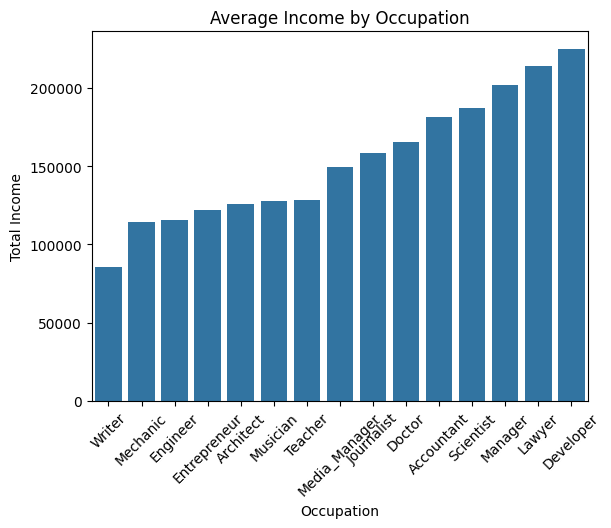

In [94]:
#Average Income for each Occupation
data_copy = data_edited.copy()
data_copy = data_copy.drop_duplicates(subset='Customer_ID', keep='first')
grouped_data = data_copy.groupby('Occupation')['Annual_Income'].mean()
sorted_data = grouped_data.sort_values(ascending=True)


sns.barplot(x=sorted_data.index, y=sorted_data.values)
plt.title('Average Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Total Income')
plt.xticks(rotation=45)
plt.show()

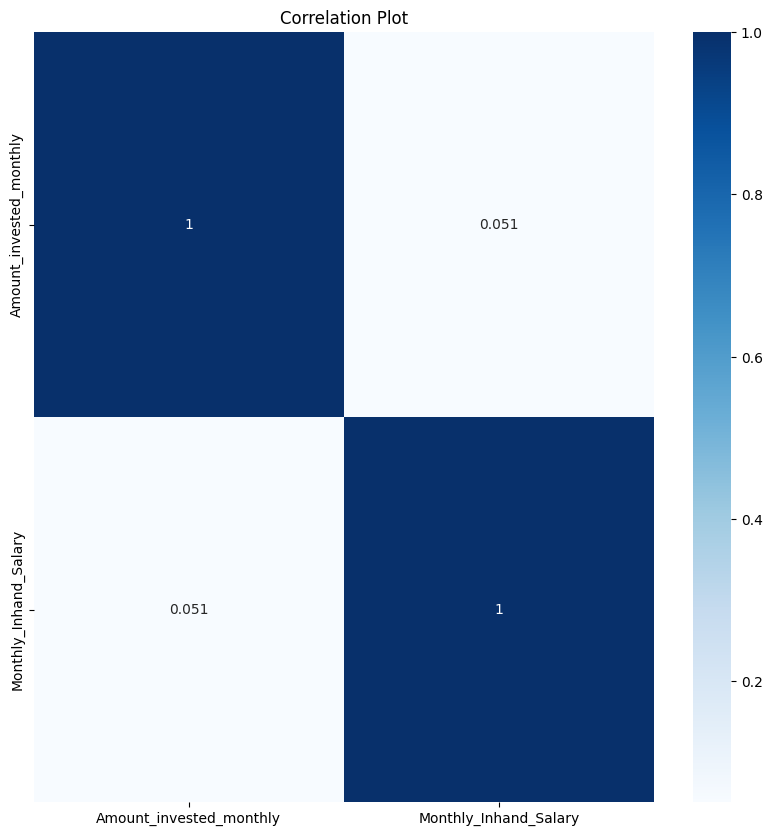

In [95]:
#to see if the amount invested monthly has anything to do with the customers monthly income
coorl= ['Amount_invested_monthly','Monthly_Inhand_Salary']
plt.figure(figsize=(10,10))
sns.heatmap(data[coorl].corr(),annot=True,cmap='Blues')
plt.title('Correlation between Monthly salary and Amount invested')
plt.show()

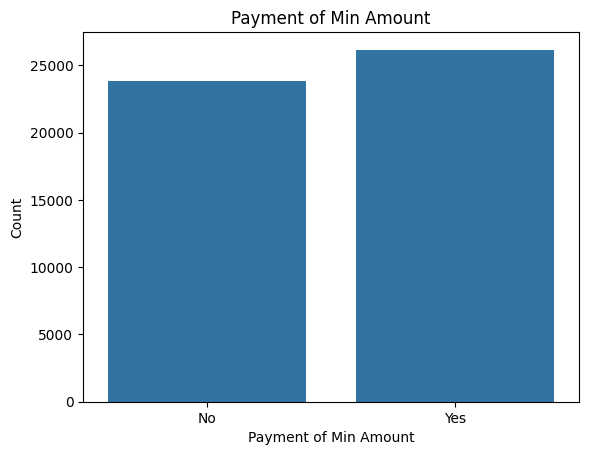

In [96]:
#number of those who paid mimimum amount
sns.countplot(x='Payment_of_Min_Amount', data=data_edited)
plt.title('Occurrences of Payment')
plt.xlabel('Payment of Min Amount')
plt.ylabel('Count')
plt.show()

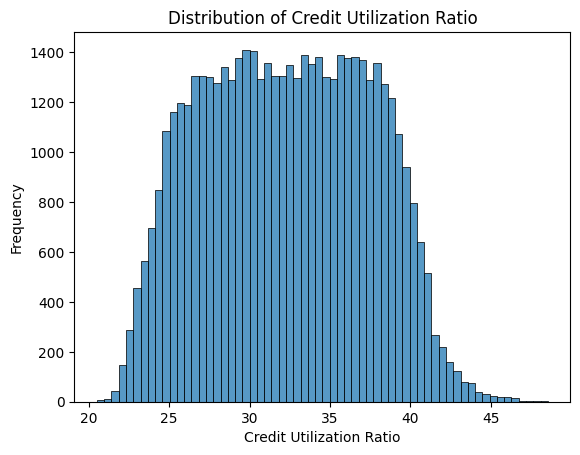

In [97]:
##Distribution of credit utilization ratio.
sns.histplot(data_edited['Credit_Utilization_Ratio'])
plt.title('Distribution of Credit Utilization Ratio')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Frequency')
plt.show()

In [98]:
data_edited.head(20)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_Edit
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.00,11.27,2022.0,Good,809.98,35.03,No,49.57,236.64,Low spent Small value payments,186.27,22.750000
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9.00,13.27,4.0,Good,809.98,33.05,No,49.57,21.47,High spent Medium value payments,361.44,22.833333
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.00,12.27,4.0,Good,809.98,33.81,No,49.57,148.23,Low spent Medium value payments,264.68,22.861111
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,4182.00,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5.00,11.27,4.0,Good,809.98,32.43,No,49.57,39.08,High spent Medium value payments,343.83,23.000000
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,1.00,5.42,5.0,Good,605.03,25.93,No,18.82,39.68,High spent Large value payments,485.30,27.250000
5,0x1617,CUS_0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,3.00,5.42,5.0,Good,605.03,30.12,No,18.82,251.63,Low spent Large value payments,303.36,27.333333
6,0x1618,CUS_0x21b1,November,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,30.91,5.42,5.0,Standard,605.03,31.00,No,18.82,72.68,High spent Large value payments,452.30,27.416667
7,0x1619,CUS_0x21b1,December,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.99,2,4,6,1.0,Credit-Builder Loan,3,2.00,7.42,5.0,Standard,605.03,33.88,No,18.82,153.53,!@9#%8,421.45,27.500000
8,0x1622,CUS_0x2dbc,September,Langep,35,486-85-3974,Engineer,143162.64,4182.00,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",8,1942.00,7.10,3.0,Good,1303.01,35.23,No,246.99,397.50,Low spent Medium value payments,854.23,18.416667
9,0x1623,CUS_0x2dbc,October,Langep,35,486-85-3974,Engineer,143162.64,12187.22,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",6,3.00,2.10,3.0,Good,1303.01,35.69,No,246.99,453.62,Low spent Large value payments,788.11,18.500000


##Loading to Postgre Database

In [4]:
!pip install psycopg2-binary==2.9.6

In [5]:
import psycopg2

In [ ]:
##establishing a connection with postgres

conn = psycopg2.connect(
     host='localhost',
     database='Fintech',
     user='postgres',
     password='1803122SD2d',
     port = 5432)


cur = conn.cursor()

In [ ]:
##creating the tables
cur.execute("""
 CREATE TABLE IF NOT EXISTS Customer_data (
     Customer_ID VARCHAR(255) PRIMARY KEY,
     Name VARCHAR(255),
     Age FLOAT,
     Occupation VARCHAR(255),
     Annual_Income FLOAT,
     Monthly_Inhand_Salary FLOAT,
     Num_Bank_Accounts FLOAT,
     Num_Credit_Card FLOAT,
     Interest_Rate FLOAT,
     Num_of_Loan FLOAT,
     Type_of_Loan VARCHAR(255),
     Delay_from_due_date FLOAT,
     Num_of_Delayed_Payment FLOAT,
     Changed_Credit_Limit FLOAT,
     Num_Credit_Inquiries FLOAT,
     Credit_Mix VARCHAR(255),
     Outstanding_Debt FLOAT,
     Credit_Utilization_Ratio FLOAT,
     Credit_History_Age_Edit FLOAT,
     Payment_of_Min_Amount VARCHAR(255),
     Total_EMI_per_month FLOAT,
     Amount_invested_monthly FLOAT,
     Payment_Behaviour VARCHAR(255),
     Monthly_Balance FLOAT
 )
 """)

In [ ]:
##inserting the data into the tables created in Postrgre

for index, row in data_edited.iterrows():
     cur.execute("""
         INSERT INTO your_table_name (Customer_ID, Name, Age, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age_Edit, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance)
         VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
     """, (row['Customer_ID'], row['Name'], row['Age'], row['Occupation'], row['Annual_Income'], row['Monthly_Inhand_Salary'], row['Num_Bank_Accounts'], row['Num_Credit_Card'], row['Interest_Rate'], row['Num_of_Loan'], row['Type_of_Loan'], row['Delay_from_due_date'], row['Num_of_Delayed_Payment'], row['Changed_Credit_Limit'], row['Num_Credit_Inquiries'], row['Credit_Mix'], row['Outstanding_Debt'], row['Credit_Utilization_Ratio'], row['Credit_History_Age_Edit'], row['Payment_of_Min_Amount'], row['Total_EMI_per_month'], row['Amount_invested_monthly'], row['Payment_Behaviour'], row['Monthly_Balance']))

In [ ]:
conn.commit()
 cur.close()
 conn.close()